In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

In [3]:
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df['target']=iris['target']

In [4]:
iris_df=iris_df.replace({'target':0},{'target':'Setosa'})
iris_df=iris_df.replace({'target':1},{'target':'Versicolor'})
iris_df=iris_df.replace({'target':2},{'target':'Virginica'})
# 0: Setosa, 1: Versicolor, 2: Virginica
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
# iris data 나누기
x=iris_df.iloc[:,:4]
y=iris_df.target

In [6]:
x_std=StandardScaler().fit_transform(x)

In [7]:
# 공분산 np.cov()
iris_cov=np.cov(x_std.T)
print(iris_cov)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [8]:
# 고유vector 찾기  np.linalg.eig()
eig_vals, eig_vecs=np.linalg.eig(iris_cov)
print('고유vector \n %s' % eig_vecs)
print('고유값 \n %s' % eig_vals)

고유vector 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
고유값 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [9]:
## 가장 큰 고유값에 data 정사영  -> 차원 축소
# sepal 가장 큰 분산 구하기
print(eig_vals[0] / sum(eig_vals[0:2]))
print(eig_vals[1] / sum(eig_vals[0:2]))

0.7615071820004647
0.23849281799953534


In [10]:
# petal 가장 큰 분산 구하기
print(eig_vals[2] / sum(eig_vals[2:4]))
print(eig_vals[3] / sum(eig_vals[2:4]))

0.876308445281628
0.12369155471837201


In [11]:
sepal=np.array([i[0:2] for i in x_std])
petal=np.array([i[2:4] for i in x_std])

# sepal, petal 정사영
projected_sepal=sepal.dot(eig_vecs.T[0][0:2])
projected_petal=petal.dot(eig_vecs.T[2][2:4])

In [12]:
pca_df=pd.DataFrame(projected_sepal, columns=['sepal'])
pca_df['petal']=projected_petal
pca_df['target']=y

<Figure size 576x432 with 0 Axes>

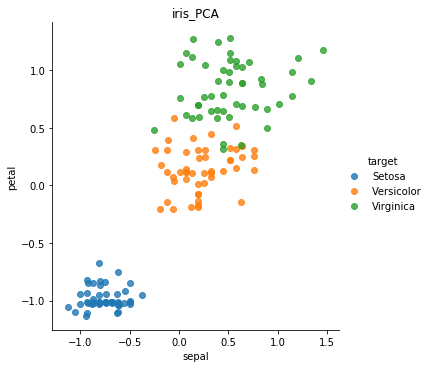

In [13]:
plt.figure(figsize=(8,6))
# sns.set_palette(sns.color_palette("muted"))
# sns.scatterplot('sepal', 'petal', data=pca_df, hue='target', s=100, palette=sns.color_palette('muted', n_colors=3))
# plt.title('Iris_PCA')
# plt.show()

sns.lmplot('sepal', 'petal', data=pca_df, hue='target', fit_reg=False)
plt.title('iris_PCA')
plt.show()

# sns.lmplot('PC1', 'yaxis', data=res, hue='label', fit_reg=False)
# plt.title('PCA result')